# Exercícios do curso de pandas e dados

## Importando dados

### Informações de um DataFrame

Considere o seguinte código Python no Jupyter:

In [1]:
import pandas as pd
data = [['Fulano', 12, 7.0, True],
        ['Sicrano', 15, 3.5, False], 
        ['Beltrano', 18, 9.3, True]]
dados = pd.DataFrame(data, 
        columns = ['Aluno', 'Idade', 'Nota', 'Aprovado'])
dados

,Aluno,Idade,Nota,Aprovado
0,Fulano,12,7.0,True
1,Sicrano,15,3.5,False
2,Beltrano,18,9.3,True


Para obtermos uma tabela contendo os nomes das variáveis e seus respectivos tipos de dados, conforme o exemplo abaixo, que linhas de código devemos executar no Jupyter?

In [8]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de dados'])

In [10]:
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de dados
Aluno,object
Idade,int64
Nota,float64
Aprovado,bool


## Series e index

### Utilizando métodos no pandas

O pandas disponibiliza um método de DataFrame para remoção de linhas duplicadas. Este método é o `drop_duplicates()`, que apresenta um conjunto de argumentos de configuração. Considerando as duas linhas de código abaixo:

In [12]:
import pandas as pd
dados = pd.DataFrame([1, 1, 2, 3, 3, 3, 4, 4], columns = ['X'])

Assinale a opção onde o método drop_duplicates() é corretamente aplicado!

In [13]:
dados.drop_duplicates(inplace = True)

In [14]:
dados

,X
0,1
2,2
3,3
6,4


## Filtrando dados

### Determinando seleções

In [1]:
import pandas as pd

numeros = [i for i in range(11)]
letras = [chr(i + 65) for i in range(11)]
nome_coluna = ['N']

df = pd.DataFrame(data = numeros, index = letras, columns = nome_coluna)

In [2]:
selecao = df['N'].isin([i for i in range(11) if i % 2 == 0])
df = df[selecao]
df

,N
A,0
C,2
E,4
G,6
I,8
K,10


###  Mais sobre classificações

In [4]:
df_A = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Carlos', 'Beto', 'Bruna', 'Ana'],
                    'Sexo': ['M', 'F', 'M', 'M', 'F', 'F'],
                    'Idade': [21, 19, 50, 29, 31, 42]})
df_A

,Nome,Sexo,Idade
0,Ary,M,21
1,Cátia,F,19
2,Carlos,M,50
3,Beto,M,29
4,Bruna,F,31
5,Ana,F,42


In [6]:
df_B = df_A.sort_values(by = ['Sexo', 'Nome'])
df_B

,Nome,Sexo,Idade
5,Ana,F,42
4,Bruna,F,31
1,Cátia,F,19
0,Ary,M,21
3,Beto,M,29
2,Carlos,M,50


## Frequências de imóveis

In [7]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

Crie um DataFrame somente com os alunos aprovados.

In [8]:
alunos[alunos.Aprovado]

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


In [10]:
# ou
selecao = alunos['Aprovado'] == True
alunos[selecao]

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


Crie um DataFrame somente com as alunas aprovadas.

In [12]:
selecao = (alunos['Aprovado'] == True) & (alunos['Sexo'] == 'F')
alunos[selecao]

,Nome,Idade,Sexo,Notas,Aprovado
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


In [14]:
# ou 
selecao = (alunos.Aprovado == True) & (alunos.Sexo == 'F')
alunos[selecao]

,Nome,Idade,Sexo,Notas,Aprovado
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


Crie apenas uma visualização dos alunos com idade entre 10 e 20 anos ou com idade maior ou igual a 40 anos.

In [16]:
selecao = ((alunos.Idade >= 10) & (alunos.Idade <= 20)) | (alunos.Idade >= 40)
alunos[selecao]

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
2,Denis,56,M,5.0,False
4,Bruna,42,F,8.2,True
6,Carlos,19,M,6.0,False


Crie um DataFrame somente com os alunos reprovados e mantenha neste DataFrame apenas as colunas Nome, Sexo e Idade, nesta ordem.

In [18]:
selecao = alunos.Aprovado == False
alunos[selecao][['Nome', 'Sexo', 'Idade']]

,Nome,Sexo,Idade
1,Cátia,F,27
2,Denis,M,56
6,Carlos,M,19
7,Alice,F,35


In [19]:
alunos[['Nome', 'Sexo', 'Idade']][selecao]

,Nome,Sexo,Idade
1,Cátia,F,27
2,Denis,M,56
6,Carlos,M,19
7,Alice,F,35


Crie uma visualização com os três alunos mais novos.

In [22]:
alunos.sort_values(by = 'Idade')[:3]

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
6,Carlos,19,M,6.0,False
5,Dara,21,F,7.0,True


## Tratando dados faltantes

### Revisando o processo

In [32]:
imoveis = pd.DataFrame([['Apartamento', None, 970, 68], 
                        ['Apartamento', 2000, 878, 112], 
                        ['Casa', 5000, None, 500], 
                        ['Apartamento', None, 1010, 170], 
                        ['Apartamento', 1500, 850, None], 
                        ['Casa', None, None, None], 
                        ['Apartamento', 2000, 878, None], 
                        ['Apartamento', 1550, None, 228], 
                        ['Apartamento', 2500, 880, 195]], 
                        columns = ['Tipo', 'Valor', 'Condominio', 'IPTU'])
imoveis

,Tipo,Valor,Condominio,IPTU
0,Apartamento,NaN,970.0,68.0
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,NaN,500.0
3,Apartamento,NaN,1010.0,170.0
4,Apartamento,1500.0,850.0,NaN
5,Casa,NaN,NaN,NaN
6,Apartamento,2000.0,878.0,NaN
7,Apartamento,1550.0,NaN,228.0
8,Apartamento,2500.0,880.0,195.0


In [33]:
# 1) Elimina os registros que não apresentam a variável Valor:
imoveis.dropna(subset = ['Valor'], inplace = True)
imoveis

,Tipo,Valor,Condominio,IPTU
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,NaN,500.0
4,Apartamento,1500.0,850.0,NaN
6,Apartamento,2000.0,878.0,NaN
7,Apartamento,1550.0,NaN,228.0
8,Apartamento,2500.0,880.0,195.0


In [34]:
# 2) Elimina os imóveis do tipo Apartamento que não apresentam valor Condominio:
selecao = (imoveis['Tipo'] == 'Apartamento') & (imoveis['Condominio'].isnull())
imoveis = imoveis[~selecao]
imoveis

,Tipo,Valor,Condominio,IPTU
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,NaN,500.0
4,Apartamento,1500.0,850.0,NaN
6,Apartamento,2000.0,878.0,NaN
8,Apartamento,2500.0,880.0,195.0


In [35]:
# 3) Substitui os valores faltantes que restam nas variáveis Condominio e IPTU por zero:
imoveis = imoveis.fillna({'Condominio': 0, 'IPTU': 0})
imoveis

,Tipo,Valor,Condominio,IPTU
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,0.0,500.0
4,Apartamento,1500.0,850.0,0.0
6,Apartamento,2000.0,878.0,0.0
8,Apartamento,2500.0,880.0,195.0


In [36]:
# 4) Reconstrói o índice do DataFrame resultante:
imoveis.index = range(imoveis.shape[0])
imoveis

,Tipo,Valor,Condominio,IPTU
0,Apartamento,2000.0,878.0,112.0
1,Casa,5000.0,0.0,500.0
2,Apartamento,1500.0,850.0,0.0
3,Apartamento,2000.0,878.0,0.0
4,Apartamento,2500.0,880.0,195.0


## Novas variáveis

###  Identifique o erro na criação de variáveis

Falando da criação de novas variáveis para um DataFrame, analise as opções abaixo e indique a que apresenta um erro durante a execução. Considere o DataFrame abaixo:

In [37]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas'])

In [42]:
alunos['Notas-Média(Notas)'] = alunos['Notas'].apply(lambda x: x - alunos['Notas'].mean())

In [43]:
alunos['Faixa Etária'] = alunos['Idade'].apply(lambda x: 'Menor que 20 anos' if x < 20 
        else ('Entre 20 e 40 anos' if (x >= 20 and x <= 40) 
            else 'Maior que 40 anos'))

In [45]:
alunos['Faixa Etária'] = alunos['Idade'].apply(lambda x: 'Menor que 20 anos' if x < 20 
        else ('Entre 20 e 40 anos' if (x >= 20 and x <= 40) 
            else 'Maior que 40 anos'))

In [41]:
alunos['Notas-Média(Notas)'] = alunos.Notas - alunos.Notas.mean()

### Testando moedas

Suponha que estejamos testando as moedas que serão utilizadas por árbitros de futebol nas competições da Copa do Mundo. Atualmente, estas moedas são personalizadas e utilizadas em certos momentos dos jogos para decidir, na sorte, uma disputa. Nosso objetivo é verificar se as moedas que serão utilizadas nas competições não sejam viciadas.

Para isso, testes foram realizados com cinco moedas e os resultados foram os seguintes:

In [47]:
m1 = 'CCcCCccCCCccCcCccCcCcCCCcCCcccCCcCcCcCcccCCcCcccCc'
m2 = 'CCCCCccCccCcCCCCccCccccCccCccCCcCccCcCcCCcCccCccCc'
m3 = 'CccCCccCcCCCCCCCCCCcccCccCCCCCCccCCCcccCCCcCCcccCC'
m4 = 'cCCccCCccCCccCCccccCcCcCcCcCcCcCCCCccccCCCcCCcCCCC'
m5 = 'CCCcCcCcCcCCCcCCcCcCCccCcCCcccCccCCcCcCcCcCcccccCc'

Acima, temos o resultado de 50 lançamentos de cada moeda (m1, m2, m3, m4 e m5), onde c representa a ocorrência do evento CARA e C representa a ocorrência do evento COROA.

Para tirarmos nossas conclusões, precisamos montar o seguinte DataFrame:

Onde Freq. C e Freq. c são, respectivamente, as frequências de COROAS e de CARAS em cada teste.

Assinale a opção que mostra o código necessário para realizar tal tarefa.

In [56]:
eventos = {'m1': list(m1),
'm2': list(m2),
'm3': list(m3),
'm4': list(m4),
'm5': list(m5)}

In [58]:
moedas = pd.DataFrame(eventos)

In [60]:
df = pd.DataFrame(data = ['Cara', 'Coroa'],
                 index = ['c', 'C'],
                 columns = ['Faces'])
df

,Faces
c,Cara
C,Coroa


In [61]:
for item in moedas:
    df = pd.concat([df, moedas[item].value_counts()], 
                    axis = 1)
df

,Faces,m1,m2,m3,m4,m5
c,Cara,25,26,19,23,25
C,Coroa,25,24,31,27,25


## Estatísticas descritivas

### Sumarizando informações

In [2]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


Como devemos proceder para obter um DataFrame com as notas médias dos alunos, com duas casas decimais, segundo seu sexo?

In [4]:
grupos_sexo = alunos.groupby('Sexo')
grupos_sexo[['Notas']].mean().round(2)

,Notas
Sexo,
F,5.82
M,7.12


### Selecionando as estatísticas descritivas

A criação de grupamentos com o método `groupby()` facilita bastante na sumarização das informações de um DataFrame. O método `describe()` aplicado a um grupamento gera um conjunto de estatísticas descritivas bastante útil no processo de análise de dados, conforme o exemplo abaixo:

In [5]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [6]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

Utilizando o DataFrame (`precos`) acima, que código seria necessário para gerar a visualização abaixo:

Produto | Média | Desvio Padrão | Mínimo | Máximo
---|---|---|---|---
Cebola | 3.96 | 0.26 | 3.69 | 4.2
Tomate | 2.06 | 0.41 | 1.69 | 2.5
Batata | 3.43 | 0.52 | 2.99 | 4.0


In [10]:
summary = produtos['Preço'].aggregate(['mean', 'std', 'min', 'max']).round(2)
summary.rename(columns = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'})

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0


## Removendo *Outliers*

### Estatísticas do box plot

<img  align="left" src="compressed_box-plot.png" alt="boxplot" width="400"/>

Nosso objetivo neste exercício é obter o conjunto de estatísticas representado na figura acima. Para isso, baixe o arquivo `aluguel_amostra.csv`, e utilize-o para realizar suas análises utilizando como variável alvo o `Valor m2` (valor do metro quadrado). Lembrando que Q1 representa o 1º quartil e Q3 o 3º quartil, selecione o item com a resposta correta (considere somente **duas casas decimais**):

In [13]:
import pandas as pd

In [15]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [19]:
valor_m2 = dados['Valor m2']
# Q1
Q1 = valor_m2.quantile(.25).round(2)
print(f'[Q1] -> {Q1}')

# Q3
Q3 = valor_m2.quantile(.75).round(2)
print(f'[Q3] -> {Q3}')

# IIQ / AIQ
IIQ = Q3 - Q1
print(f'[IIQ] -> {IIQ.round(2)}')

# Q1 - 1.5 * IIQ
print(f'[Q1 - 1.5 * IIQ] -> {(Q1 - 1.5 * IIQ).round(2)}')

# Q3 + 1.5 * IIQ
print(f'[Q3 + 1.5 * IIQ] -> {(Q3 + 1.5 * IIQ).round(2)}')

[Q1] -> 21.25
[Q3] -> 42.31
[IIQ] -> 21.06
[Q1 - 1.5 * IIQ] -> -10.34
[Q3 + 1.5 * IIQ] -> 73.9


### A biblioteca matplotlib

Vamos testar nosso conhecimento sobre o pacote matplotlib. Considere neste exercício o arquivo aluguel_amostra.csv e indique nas opções abaixo qual o código necessário para gerar os gráficos da figura a seguir:

Neste exercício, estamos apresentando o gráfico de pizza que pode ser obtido com a aplicação do método `pie()`, de matplotlib. Considere o código inicial abaixo para escolher a alternativa correta:

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


<img  align="left" src="compressed_grafico.png" alt="boxplot" width="800"/>

Text(0.5, 1.0, 'Total de imóveis por tipo')

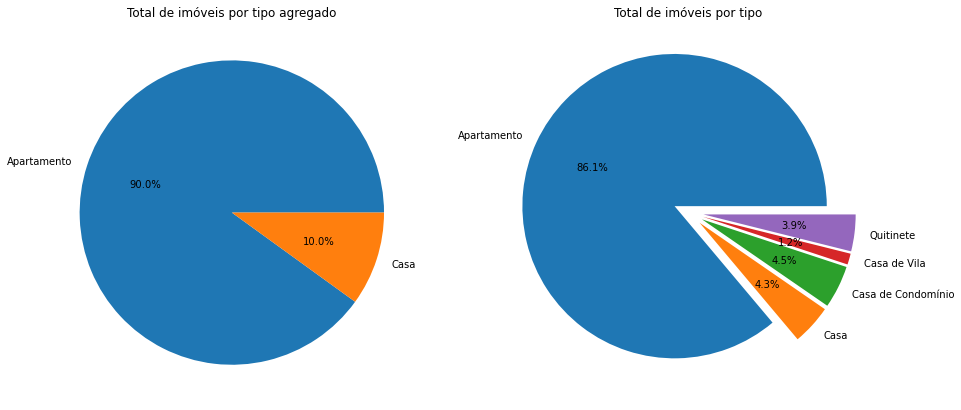

In [44]:
area = plt.figure()

g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

# gráfico 1
grupo_1 = dados.groupby('Tipo Agregado')['Tipo'].count()
labels = grupo_1.index
valores = grupo_1.values
g1.pie(valores, labels = labels, autopct = '%1.1f%%')
g1.set_title('Total de imóveis por tipo agregado')

# gráfico 2
grupo_2 = dados.groupby('Tipo')['Tipo'].count()
labels = grupo_2.index
valores = grupo_2.values
g2.pie(valores, labels = labels, autopct = '%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de imóveis por tipo')

In [42]:
area = ''